 Universidade Federal de Minas Gerais
 # Targets
 

 Arthur Phillip Ferreira da Silva
 
 Gabriel Almeida de Jesus

 Bibliotecas utilizadas

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


 Importando imagem base em escala de cinza

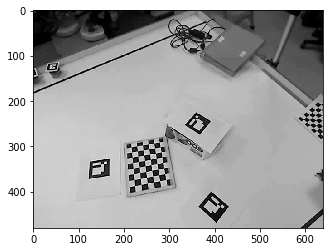

In [9]:
cap = cv2.VideoCapture('entrada.avi')
ret, frame = cap.read()
image = frame
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

 Fazendo a binarização da imagem

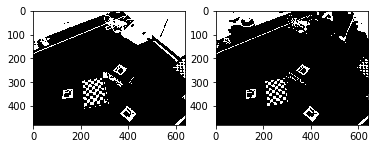

In [10]:
(T, binary) = cv2.threshold(gray, 100, 150, cv2.THRESH_BINARY_INV)
(H, compare) = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

fig, (img1, img2) = plt.subplots(1, 2)

img1.imshow(binary, cmap='gray')
img2.imshow(compare, cmap='gray')

 Detectando bordas

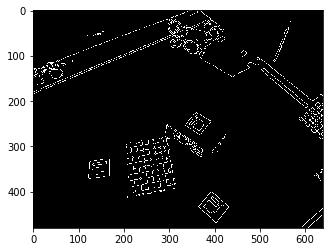

In [11]:
edges = cv2.Canny(binary,100,200)

plt.imshow(edges, cmap='gray')

 Detectando quinas

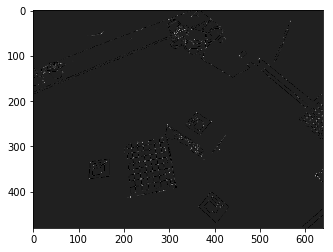

In [12]:
imggray = np.float32(binary)
imggrayCRN = np.float32(compare)

corners = cv2.cornerHarris(imggray,2,3,0.04)
compareCRN = cv2.cornerHarris(imggrayCRN,3,25,0.04)

# fig, (crn1, crn2) = plt.subplots(1, 2)

plt.imshow(corners, cmap='gray')
# crn1.imshow(corners, cmap='gray')
# crn2.imshow(compareCRN, cmap='gray')

Formando os quadrilateros

In [13]:
print(corners.shape[0])
print(corners.shape[1])


#for altura in range(image.shape[0]):
#    for largura in range(image.shape[1]):
#        (r, g, b) = image[altura, largura]
        
    

480
640


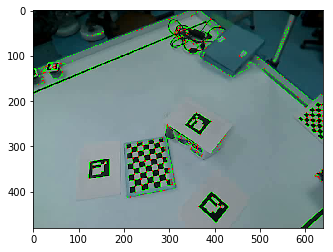

In [14]:
image[edges>0.1*edges.max()]=[0,255,0]
image[corners>0.1*corners.max()]=[255,0,0]

plt.imshow(image, cmap='gray')

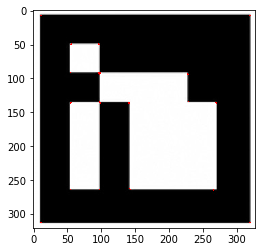

In [15]:
target = cv2.imread('alvo.jpg')
t_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
(T, t_bin) = cv2.threshold(t_gray, 100, 200, cv2.THRESH_BINARY_INV)
t_gray = np.float32(t_bin)
t_corners = cv2.cornerHarris(t_gray,2,3,0.04)
target[t_corners>0.01*t_corners.max()]=[255,0,0]

plt.imshow(target, cmap='gray')

In [16]:
H=[]
cv2.findHomography( 
    [(10.0,10.0),(10.0,320.0),(320.0,320.0),(320.0,10.0)], 
    [(842.0,23.0),(759.0,135.0),(882.0,196.0),(965.0,78.0)]
)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

In [17]:
#  perspectiveTransform( obj_corners, scene_corners, H);

In [24]:
limit = 0.02*corners.max()
print(limit)
for row in range(len(corners)):
    for col in range(len(corners[0])):
        
        if corners[row,col] > limit:
            print ("({0},{1}): {2:.2f} %".format(col,row,100*corners[row,col]/corners.max()))
    


2691035.2
(348,0): 11.76 %
(349,0): 15.05 %
(350,0): 13.43 %
(351,0): 3.95 %
(363,0): 2.41 %
(368,0): 12.49 %
(369,0): 21.55 %
(348,1): 11.76 %
(349,1): 15.05 %
(350,1): 13.43 %
(351,1): 3.95 %
(363,1): 2.41 %
(368,1): 12.49 %
(369,1): 21.55 %
(343,2): 2.41 %
(345,3): 2.41 %
(359,3): 22.65 %
(360,3): 19.47 %
(338,4): 2.41 %
(342,4): 2.41 %
(360,4): 7.35 %
(358,5): 7.35 %
(363,5): 2.41 %
(333,6): 7.35 %
(336,6): 2.41 %
(376,6): 7.35 %
(332,7): 22.65 %
(334,7): 7.19 %
(356,7): 7.35 %
(365,7): 2.41 %
(375,7): 7.19 %
(377,7): 7.19 %
(332,8): 19.47 %
(333,8): 7.35 %
(354,8): 7.35 %
(365,8): 3.07 %
(376,8): 7.35 %
(329,9): 2.41 %
(353,9): 7.19 %
(355,9): 7.19 %
(365,9): 3.07 %
(323,10): 2.41 %
(348,10): 7.35 %
(349,10): 46.80 %
(351,10): 5.23 %
(352,10): 3.59 %
(353,10): 10.82 %
(354,10): 24.99 %
(355,10): 19.12 %
(348,11): 19.47 %
(349,11): 60.13 %
(350,11): 7.35 %
(351,11): 7.95 %
(352,11): 7.35 %
(353,11): 9.10 %
(362,11): 2.22 %
(363,11): 8.61 %
(364,11): 24.97 %
(365,11): 5.88 %
(318,12

(557,58): 2.41 %
(190,59): 2.41 %
(193,59): 2.41 %
(295,59): 2.41 %
(298,59): 2.41 %
(304,59): 2.41 %
(320,59): 3.37 %
(321,59): 54.61 %
(322,59): 65.68 %
(324,59): 13.95 %
(332,59): 10.16 %
(333,59): 50.47 %
(334,59): 14.49 %
(380,59): 19.47 %
(381,59): 65.68 %
(382,59): 19.47 %
(421,59): 7.35 %
(552,59): 7.35 %
(554,59): 7.35 %
(186,60): 2.41 %
(306,60): 2.41 %
(314,60): 5.09 %
(320,60): 10.30 %
(321,60): 11.77 %
(322,60): 19.05 %
(324,60): 25.59 %
(325,60): 24.99 %
(333,60): 20.15 %
(334,60): 8.17 %
(380,60): 7.35 %
(381,60): 54.61 %
(382,60): 7.35 %
(394,60): 2.41 %
(420,60): 7.19 %
(422,60): 22.65 %
(552,60): 19.47 %
(553,60): 22.65 %
(188,61): 2.41 %
(293,61): 2.41 %
(299,61): 2.41 %
(303,61): 2.41 %
(314,61): 5.09 %
(317,61): 2.41 %
(318,61): 2.41 %
(321,61): 5.09 %
(322,61): 12.49 %
(323,61): 3.67 %
(324,61): 8.47 %
(325,61): 8.17 %
(421,61): 7.35 %
(422,61): 19.47 %
(423,61): 19.47 %
(424,61): 7.35 %
(181,62): 2.41 %
(185,62): 2.41 %
(216,62): 24.99 %
(217,62): 8.17 %
(287,62)

(164,112): 2.41 %
(175,112): 2.41 %
(377,112): 7.35 %
(498,112): 2.41 %
(532,112): 2.41 %
(53,113): 7.35 %
(54,113): 6.25 %
(56,113): 3.37 %
(166,113): 2.41 %
(532,113): 7.35 %
(533,113): 24.12 %
(534,113): 7.35 %
(48,114): 2.41 %
(163,114): 2.41 %
(170,114): 2.41 %
(173,114): 2.41 %
(383,114): 2.41 %
(533,114): 32.70 %
(44,115): 2.41 %
(56,115): 5.23 %
(157,115): 2.41 %
(167,115): 2.41 %
(478,115): 3.07 %
(481,115): 32.70 %
(44,116): 5.35 %
(45,116): 15.42 %
(46,116): 9.76 %
(55,116): 19.47 %
(56,116): 7.35 %
(60,116): 14.49 %
(61,116): 8.17 %
(154,116): 2.41 %
(169,116): 2.41 %
(385,116): 2.41 %
(480,116): 3.07 %
(481,116): 24.12 %
(33,117): 7.48 %
(38,117): 9.76 %
(39,117): 15.42 %
(40,117): 5.35 %
(51,117): 2.41 %
(55,117): 40.78 %
(56,117): 19.47 %
(60,117): 50.47 %
(61,117): 11.76 %
(62,117): 23.52 %
(63,117): 12.49 %
(64,117): 3.07 %
(65,117): 2.41 %
(156,117): 2.41 %
(162,117): 2.41 %
(166,117): 2.41 %
(476,117): 7.35 %
(498,117): 2.41 %
(34,118): 7.19 %
(35,118): 19.47 %
(40,1

(635,187): 2.41 %
(636,187): 22.65 %
(638,187): 7.19 %
(631,188): 7.19 %
(633,188): 7.19 %
(637,188): 7.35 %
(584,189): 7.35 %
(632,189): 7.35 %
(639,189): 3.07 %
(583,190): 22.65 %
(584,190): 19.47 %
(584,191): 19.47 %
(585,191): 40.78 %
(584,192): 7.35 %
(585,192): 19.47 %
(608,192): 7.35 %
(627,192): 7.19 %
(586,193): 2.41 %
(607,193): 7.19 %
(628,193): 7.35 %
(609,194): 7.35 %
(592,196): 7.35 %
(591,197): 7.19 %
(593,197): 7.19 %
(592,198): 7.35 %
(618,200): 24.12 %
(598,201): 7.35 %
(618,201): 32.70 %
(597,202): 7.19 %
(599,202): 7.19 %
(598,203): 7.35 %
(629,203): 32.70 %
(629,204): 24.12 %
(639,205): 12.49 %
(592,206): 7.35 %
(603,206): 7.35 %
(639,206): 21.55 %
(591,207): 7.19 %
(593,207): 7.19 %
(605,207): 7.19 %
(636,207): 24.12 %
(592,208): 7.35 %
(604,208): 7.35 %
(636,208): 34.17 %
(637,208): 6.11 %
(606,209): 7.35 %
(623,209): 32.70 %
(624,209): 24.12 %
(635,209): 15.06 %
(636,209): 28.16 %
(637,209): 21.68 %
(606,210): 24.12 %
(607,210): 32.70 %
(636,210): 21.55 %
(637,2

(292,277): 21.55 %
(312,277): 2.41 %
(317,277): 7.35 %
(327,277): 5.09 %
(423,277): 2.59 %
(424,277): 5.42 %
(425,277): 6.25 %
(628,277): 12.49 %
(629,277): 36.88 %
(630,277): 5.31 %
(319,278): 7.35 %
(322,278): 6.25 %
(323,278): 5.42 %
(324,278): 7.04 %
(325,278): 4.25 %
(326,278): 15.67 %
(327,278): 50.47 %
(328,278): 13.14 %
(329,278): 2.59 %
(422,278): 14.49 %
(423,278): 7.44 %
(424,278): 2.59 %
(628,278): 12.49 %
(629,278): 21.55 %
(314,279): 2.41 %
(317,279): 5.23 %
(318,279): 54.61 %
(319,279): 54.61 %
(322,279): 13.65 %
(323,279): 8.14 %
(324,279): 14.49 %
(327,279): 20.15 %
(328,279): 8.17 %
(331,279): 14.49 %
(332,279): 5.09 %
(422,279): 25.29 %
(423,279): 24.99 %
(282,280): 3.59 %
(283,280): 9.10 %
(285,280): 25.29 %
(286,280): 7.35 %
(314,280): 3.07 %
(317,280): 7.35 %
(319,280): 7.35 %
(322,280): 5.88 %
(323,280): 4.78 %
(324,280): 7.35 %
(327,280): 3.25 %
(328,280): 5.23 %
(330,280): 6.25 %
(331,280): 8.14 %
(332,280): 4.94 %
(333,280): 6.61 %
(280,281): 12.49 %
(282,281)

(372,323): 7.35 %
(220,324): 19.47 %
(221,324): 40.78 %
(222,324): 2.41 %
(232,324): 13.23 %
(233,324): 19.05 %
(234,324): 40.78 %
(285,324): 12.49 %
(286,324): 5.09 %
(294,324): 19.47 %
(295,324): 7.35 %
(303,324): 9.19 %
(304,324): 8.76 %
(305,324): 2.41 %
(219,325): 13.23 %
(220,325): 11.77 %
(221,325): 19.05 %
(224,325): 2.41 %
(247,325): 2.41 %
(260,325): 2.41 %
(273,325): 2.41 %
(282,325): 2.41 %
(285,325): 19.05 %
(286,325): 11.77 %
(287,325): 13.23 %
(294,325): 40.78 %
(295,325): 19.47 %
(302,325): 2.41 %
(303,325): 8.76 %
(304,325): 9.19 %
(208,326): 19.47 %
(209,326): 40.78 %
(210,326): 2.41 %
(219,326): 19.05 %
(220,326): 11.77 %
(221,326): 13.23 %
(271,326): 5.88 %
(272,326): 24.97 %
(273,326): 8.61 %
(274,326): 2.22 %
(284,326): 2.41 %
(285,326): 40.78 %
(286,326): 19.47 %
(296,326): 7.35 %
(304,326): 9.76 %
(165,327): 2.41 %
(168,327): 19.47 %
(169,327): 7.35 %
(208,327): 7.35 %
(209,327): 19.47 %
(212,327): 2.41 %
(219,327): 40.78 %
(220,327): 19.47 %
(246,327): 2.41 %
(

(632,373): 8.17 %
(633,373): 7.66 %
(223,374): 13.23 %
(224,374): 11.77 %
(225,374): 19.05 %
(231,374): 2.41 %
(239,374): 2.41 %
(293,374): 19.12 %
(294,374): 20.41 %
(295,374): 20.81 %
(300,374): 2.41 %
(302,374): 40.78 %
(303,374): 23.09 %
(304,374): 15.20 %
(305,374): 15.80 %
(306,374): 8.47 %
(633,374): 7.19 %
(218,375): 2.41 %
(223,375): 19.05 %
(224,375): 11.77 %
(225,375): 13.23 %
(253,375): 2.41 %
(281,375): 2.41 %
(287,375): 2.41 %
(294,375): 20.81 %
(295,375): 20.41 %
(296,375): 19.12 %
(304,375): 9.76 %
(305,375): 5.35 %
(314,375): 2.41 %
(212,376): 19.47 %
(213,376): 60.13 %
(220,376): 2.41 %
(223,376): 22.65 %
(238,376): 2.41 %
(267,376): 2.41 %
(279,376): 15.06 %
(280,376): 25.59 %
(281,376): 10.30 %
(284,376): 2.41 %
(289,376): 2.41 %
(294,376): 40.78 %
(295,376): 19.47 %
(636,376): 22.65 %
(212,377): 7.35 %
(213,377): 46.80 %
(215,377): 2.41 %
(252,377): 2.41 %
(277,377): 2.41 %
(280,377): 18.58 %
(281,377): 16.17 %
(282,377): 11.39 %
(286,377): 2.41 %
(635,377): 7.35 %